In [1]:
! kaggle datasets download -d gpiosenka/100-bird-species

Dataset URL: https://www.kaggle.com/datasets/gpiosenka/100-bird-species
License(s): CC0-1.0
100% 1.95G/1.96G [01:30<00:00, 24.9MB/s]
100% 1.96G/1.96G [01:30<00:00, 23.1MB/s]


In [2]:
import zipfile
import os

zip_path = '/content/100-bird-species.zip'

# directory to unzip (can change if you want)
extract_to = '/content/birds_dataset'

# removes any current directory with name
if os.path.exists(extract_to):
    !rm -rf {extract_to}

os.makedirs(extract_to, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Unzipping completed!")

Unzipping completed!


In [3]:

train_dir = '/content/birds_dataset/train'
test_dir = '/content/birds_dataset/test'
valid_dir = '/content/birds_dataset/valid'

# counts files
def count_images(directory):
    count = 0
    for _, _, files in os.walk(directory):
        count += len(files)
    return count

train_count = count_images(train_dir)
valid_count = count_images(valid_dir)
test_count = count_images(test_dir)
train_split = train_count / (train_count+test_count+valid_count)
valid_split = valid_count / (train_count+test_count+valid_count)
test_split = test_count / (train_count+test_count+valid_count)


print(f"Number of images in Train: {train_count} with split: {train_split}")
print(f"Number of images in Valid: {valid_count} with split: {valid_split}")
print(f"Number of images in Test: {test_count} with split: {test_split}")

Number of images in Train: 84635 with split: 0.9415920342660066
Number of images in Valid: 2625 with split: 0.029203982866996717
Number of images in Test: 2625 with split: 0.029203982866996717


In [4]:
def check_directories(path):
    subdirs = os.listdir(path)
    print(f'Total directories in {path}: {len(subdirs)}')
    return set(os.listdir(path))

# Retrieve the list of species in each directory
train_species = check_directories(train_dir)
test_species = check_directories(test_dir)
valid_species = check_directories(valid_dir)

# Find the union of all species (all species that appear in any directory)
all_species = train_species.union(test_species).union(valid_species)

# Find what is missing from each set
missing_from_train = all_species - train_species
missing_from_test = all_species - test_species
missing_from_valid = all_species - valid_species

print("Species missing from train:", missing_from_train)
print("Species missing from test:", missing_from_test)
print("Species missing from valid:", missing_from_valid)

Total directories in /content/birds_dataset/train: 525
Total directories in /content/birds_dataset/test: 525
Total directories in /content/birds_dataset/valid: 525
Species missing from train: {'PARAKETT AUKLET'}
Species missing from test: {'PARAKETT AUKLET'}
Species missing from valid: {'PARAKETT  AUKLET'}


In [5]:

import os

train_dir = '/content/birds_dataset/train'
test_dir = '/content/birds_dataset/test'

# Define the incorrect and correct paths for train and test
incorrect_path_train = os.path.join(train_dir, 'PARAKETT  AUKLET')
correct_path_train = os.path.join(train_dir, 'PARAKETT AUKLET')

incorrect_path_test = os.path.join(test_dir, 'PARAKETT  AUKLET')
correct_path_test = os.path.join(test_dir, 'PARAKETT AUKLET')

# Rename the directories in train and test
try:
    os.rename(incorrect_path_train, correct_path_train)
    print(f"Renamed in train from '{incorrect_path_train}' to '{correct_path_train}'")
except FileNotFoundError as e:
    print(f"Error in train rename: {e}")

try:
    os.rename(incorrect_path_test, correct_path_test)
    print(f"Renamed in test from '{incorrect_path_test}' to '{correct_path_test}'")
except FileNotFoundError as e:
    print(f"Error in test rename: {e}")

Renamed in train from '/content/birds_dataset/train/PARAKETT  AUKLET' to '/content/birds_dataset/train/PARAKETT AUKLET'
Renamed in test from '/content/birds_dataset/test/PARAKETT  AUKLET' to '/content/birds_dataset/test/PARAKETT AUKLET'


In [6]:

def check_directories(path):
    subdirs = os.listdir(path)
    print(f'Total directories in {path}: {len(subdirs)}')
    return set(os.listdir(path))

# Retrieve the list of species in each directory
train_species = check_directories(train_dir)
test_species = check_directories(test_dir)
valid_species = check_directories(valid_dir)

# Find the union of all species (all species that appear in any directory)
all_species = train_species.union(test_species).union(valid_species)

# Find what is missing from each set
missing_from_train = all_species - train_species
missing_from_test = all_species - test_species
missing_from_valid = all_species - valid_species

print("Species missing from train:", missing_from_train)
print("Species missing from test:", missing_from_test)
print("Species missing from valid:", missing_from_valid)

Total directories in /content/birds_dataset/train: 525
Total directories in /content/birds_dataset/test: 525
Total directories in /content/birds_dataset/valid: 525
Species missing from train: set()
Species missing from test: set()
Species missing from valid: set()


In [7]:
import os
import shutil

def adjust_dataset_split(train_dir, test_dir, valid_dir, num_test_files, num_valid_files):
    # iterates through each species directory in the train directory
    for species in os.listdir(train_dir):
        species_train_dir = os.path.join(train_dir, species)
        species_test_dir = os.path.join(test_dir, species)
        species_valid_dir = os.path.join(valid_dir, species)

        # train directory files for each species
        files = os.listdir(species_train_dir)

        # ensures test and valid directories exist
        os.makedirs(species_test_dir, exist_ok=True)
        os.makedirs(species_valid_dir, exist_ok=True)

        # move files to test
        for file in files[:num_test_files]:
            shutil.move(os.path.join(species_train_dir, file), os.path.join(species_test_dir, file))

        # update list of files remaining in train
        remaining_files = os.listdir(species_train_dir)

        # move files to valid
        for file in remaining_files[:num_valid_files]:
            shutil.move(os.path.join(species_train_dir, file), os.path.join(species_valid_dir, file))


# specify number of files to move to respective dirs
num_test_files = 10
num_valid_files = 10


adjust_dataset_split(train_dir, test_dir, valid_dir, num_test_files, num_valid_files)
print("Files have been moved to achieve the specified dataset split.")


Files have been moved to achieve the specified dataset split.


In [8]:

train_count = count_images(train_dir)
valid_count = count_images(valid_dir)
test_count = count_images(test_dir)
train_split = train_count / (train_count+test_count+valid_count)
valid_split = valid_count / (train_count+test_count+valid_count)
test_split = test_count / (train_count+test_count+valid_count)


print(f"Number of images in Train: {train_count} with proportion: {train_split}")
print(f"Number of images in Valid: {valid_count} with proportion: {valid_split}")
print(f"Number of images in Test: {test_count} with proportion: {test_split}")

Number of images in Train: 74135 with proportion: 0.8247761027980197
Number of images in Valid: 7875 with proportion: 0.08761194860099016
Number of images in Test: 7875 with proportion: 0.08761194860099016


In [9]:
classes_count = {}
def count(directory):
    count = 0
    for filename, i, files in os.walk(directory):
        count += len(files)
        class_name = filename.split("/")[-1]
        classes_count[class_name] = len(files)
    return classes_count
classes_count = count(train_dir)
print(classes_count)
print(classes_count["GYRFALCON"])

{'train': 0, 'JANDAYA PARAKEET': 142, 'WHITE EARED HUMMINGBIRD': 156, 'MYNA': 121, 'NORTHERN GANNET': 134, 'FAIRY TERN': 116, 'OCELLATED TURKEY': 139, 'GOLDEN PIPIT': 138, 'SNOWY EGRET': 112, 'RED BEARDED BEE EATER': 177, 'CHINESE POND HERON': 124, 'LILAC ROLLER': 118, 'NORTHERN MOCKINGBIRD': 120, 'INDIAN VULTURE': 130, 'AZARAS SPINETAIL': 148, 'AZURE BREASTED PITTA': 121, 'HIMALAYAN BLUETAIL': 130, 'TURQUOISE MOTMOT': 136, 'ROSEATE SPOONBILL': 173, 'BANDED STILT': 133, 'PALM NUT VULTURE': 172, 'COMMON HOUSE MARTIN': 137, 'CHATTERING LORY': 117, 'ALBATROSS': 112, 'GREAT GRAY OWL': 124, 'JABIRU': 123, 'AMERICAN DIPPER': 173, 'STRIPPED MANAKIN': 124, 'EURASIAN GOLDEN ORIOLE': 110, 'GLOSSY IBIS': 155, 'BEARDED REEDLING': 124, 'RAZORBILL': 173, 'INDIAN BUSTARD': 111, 'ELEGANT TROGON': 124, 'SNOWY SHEATHBILL': 167, 'CALIFORNIA GULL': 140, 'BLUE GROSBEAK': 150, 'WHITE CRESTED HORNBILL': 139, 'WHIMBREL': 118, 'HOODED MERGANSER': 115, 'BLONDE CRESTED WOODPECKER': 124, 'RED BELLIED PITTA': 126,

In [ ]:
def check_directories(path):
    subdirs = os.listdir(path)
    print(f'Total directories in {path}: {len(subdirs)}')
    return set(os.listdir(path))

# Retrieve the list of species in each directory
train_species = check_directories(train_dir)
test_species = check_directories(test_dir)
valid_species = check_directories(valid_dir)

# Find the union of all species (all species that appear in any directory)
all_species = train_species.union(test_species).union(valid_species)

# Find what is missing from each set
missing_from_train = all_species - train_species
missing_from_test = all_species - test_species
missing_from_valid = all_species - valid_species

print("Species missing from train:", missing_from_train)
print("Species missing from test:", missing_from_test)

Total directories in /content/birds_dataset/train: 525
Total directories in /content/birds_dataset/test: 525
Total directories in /content/birds_dataset/valid: 525
Species missing from train: set()
Species missing from test: set()


In [12]:
!pip install vit_keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 3.3 MB/s eta 0:00:00


In [10]:
!pip install tensorflow-addons==0.16.1
import tensorflow_addons as tfa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.6.0 and strictly below 2.9.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.15.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [13]:
import tensorflow as tf
from tensorflow.keras import backend, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GaussianNoise, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

from vit_keras import vit

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

def allocate_gpu_memory(gpu_number=0):
    physical_devices = tf.config.experimental.list_physical_devices('GPU')

    if physical_devices:
        try:
            print("Found {} GPU(s)".format(len(physical_devices)))
            tf.config.set_visible_devices(physical_devices[gpu_number], 'GPU')
            tf.config.experimental.set_memory_growth(physical_devices[gpu_number], True)
            print("#{} GPU memory is allocated".format(gpu_number))
        except RuntimeError as e:
            print(e)
    else:
        print("Not enough GPU hardware devices available")
allocate_gpu_memory()
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

Found 1 GPU(s)
#0 GPU memory is allocated


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1308330051535538099
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 21991653376
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17025336254579654406
 physical_device_desc: "device: 0, name: NVIDIA L4, pci bus id: 0000:00:03.0, compute capability: 8.9"
 xla_global_id: 416903419]

In [ ]:
backend.clear_session()
img_size = 224
# Change back to 32 if you want
vit_model = vit.vit_l32(
    image_size=img_size,
    pretrained=True,
    include_top=False,
    pretrained_top=False
)

print("number of layers:", len(vit_model.layers))
print(vit_model.summary())

1226658854/1226658854 [==============================] - 3s 0us/step


/usr/local/lib/python3.10/dist-packages/vit_keras/utils.py:81: UserWarning: Resizing position embeddings from 12, 12 to 7, 7
  warnings.warn(


number of layers: 31
Model: "vit-l32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 embedding (Conv2D)          (None, 7, 7, 1024)        3146752   
                                                                 
 reshape (Reshape)           (None, 49, 1024)          0         
                                                                 
 class_token (ClassToken)    (None, 50, 1024)          1024      
                                                                 
 Transformer/posembed_input  (None, 50, 1024)          51200     
  (AddPositionEmbs)                                              
                                                                 
 Transformer/encoderblock_0  ((None, 50, 1024),        12596224  
  (TransformerBlock)          (None, 1

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

valid_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

In [16]:
img_size = 224
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    color_mode='rgb',
    class_mode='sparse',
    shuffle=True,
)

validation_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    color_mode='rgb',
    class_mode='sparse')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    color_mode='rgb',
    class_mode='sparse')

Found 74135 images belonging to 525 classes.
Found 7875 images belonging to 525 classes.
Found 7875 images belonging to 525 classes.


In [ ]:

def scheduler(epoch: int, lr: float) -> float:
    if epoch != 0 and epoch % 7 == 0:
        return lr * 0.1
    else:
        return lr
lr_scheduler_callback = LearningRateScheduler(scheduler)

Epoch 1/25
2317/2317 [==============================] - ETA: 0s - loss: 0.7071 - accuracy: 0.8342
Epoch 1: saving model to training_1/cp.ckpt
2317/2317 [==============================] - 556s 226ms/step - loss: 0.7071 - accuracy: 0.8342 - val_loss: 0.3399 - val_accuracy: 0.9161 - lr: 0.0010
Epoch 2/25
2317/2317 [==============================] - ETA: 0s - loss: 0.2881 - accuracy: 0.9236
Epoch 2: saving model to training_1/cp.ckpt
2317/2317 [==============================] - 521s 225ms/step - loss: 0.2881 - accuracy: 0.9236 - val_loss: 0.2981 - val_accuracy: 0.9217 - lr: 0.0010
Epoch 3/25
2317/2317 [==============================] - ETA: 0s - loss: 0.2207 - accuracy: 0.9394
Epoch 3: saving model to training_1/cp.ckpt
2317/2317 [==============================] - 520s 224ms/step - loss: 0.2207 - accuracy: 0.9394 - val_loss: 0.3041 - val_accuracy: 0.9271 - lr: 0.0010
Epoch 4/25
2317/2317 [==============================] - ETA: 0s - loss: 0.1776 - accuracy: 0.9491
Epoch 4: saving model to t

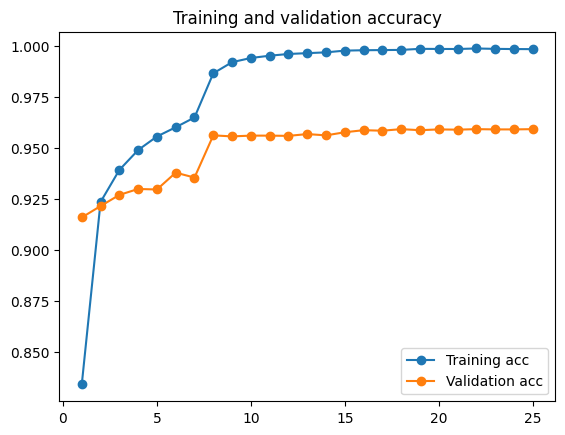

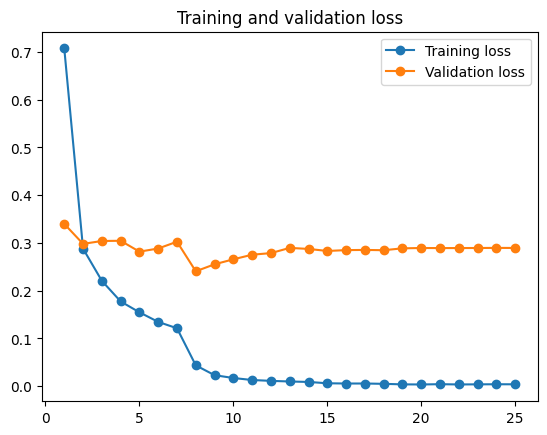

In [ ]:

finetune_at = 28
import os
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# fine-tuning
for layer in vit_model.layers[:finetune_at - 1]:
    layer.trainable = False

num_classes = len(validation_generator.class_indices)

# Add GaussianNoise layer for robustness
# noise = GaussianNoise(0.01, input_shape=(img_size, img_size, 3))
# Classification head
head = Dense(num_classes, activation="softmax")

model = Sequential()
# model.add(noise)
model.add(vit_model)
model.add(head)

model.compile(optimizer=optimizers.Adam(),
               loss="sparse_categorical_crossentropy",
               metrics=["accuracy"])

history = model.fit(
          train_generator,
          epochs=25,
          validation_data=validation_generator,
          verbose=1,
          shuffle=True,
          callbacks=[
              EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True),
              lr_scheduler_callback, cp_callback
          ])

test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-o', label='Training acc')
plt.plot(epochs, val_acc, '-o', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, '-o', label='Training loss')
plt.plot(epochs, val_loss, '-o', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
import numpy as np
print("best val_acc:", np.max(val_acc), "epoch:", np.argmax(val_acc))
print("best val_loss:", np.min(val_loss), "epoch:", np.argmin(val_loss))
# predictions = model.predict(test_generator, verbose=0)

best val_acc: 0.9593650698661804 epoch: 17
best val_loss: 0.2407112419605255 epoch: 7


In [ ]:
##### NOTEBOOK CRASHED LAST TRY
import numpy as np
cnt = 0
predictions = []
labels = []
for ix in test_generator:
  print("Step", cnt)
  preds = np.argmax(model.predict(ix[0]), axis=1)
  for idx in range(len(preds)):
    predictions.append(preds[idx])
    labels.append(int(ix[1][idx]))
  cnt += 1
  if cnt > 246:
    break


num_wrong_classes = {}
for i in range(len(validation_generator.class_indices)):
  num_wrong_classes[str(i)] = 0

for i in range(len(labels)):
  lab = labels[i]
  p = predictions[i]
  if lab != p:
    num_wrong_classes[str(lab)] += 1
print(num_wrong_classes)

class_names_wrong = {}




Step 0
1/1 [==============================] - 4s 4s/step
Step 1
1/1 [==============================] - 0s 55ms/step
Step 2
1/1 [==============================] - 0s 53ms/step
Step 3
1/1 [==============================] - 0s 54ms/step
Step 4
1/1 [==============================] - 0s 53ms/step
Step 5
1/1 [==============================] - 0s 55ms/step
Step 6
1/1 [==============================] - 0s 53ms/step
Step 7
1/1 [==============================] - 0s 53ms/step
Step 8
1/1 [==============================] - 0s 56ms/step
Step 9
1/1 [==============================] - 0s 53ms/step
Step 10
1/1 [==============================] - 0s 53ms/step
Step 11
1/1 [==============================] - 0s 54ms/step
Step 12
1/1 [==============================] - 0s 53ms/step
Step 13
1/1 [==============================] - 0s 53ms/step
Step 14
1/1 [==============================] - 0s 54ms/step
Step 15
1/1 [==============================] - 0s 52ms/step
Step 16
1/1 [==============================] - 0s 56

In [17]:
wrong_per_class = {'0': 1, '1': 4, '2': 0, '3': 0, '4': 1, '5': 2, '6': 0, '7': 0, '8': 1, '9': 0, '10': 1, '11': 1, '12': 1, '13': 1, '14': 0, '15': 1, '16': 0, '17': 0, '18': 0, '19': 0, '20': 0, '21': 0, '22': 0, '23': 0, '24': 0, '25': 0, '26': 1, '27': 2, '28': 1, '29': 0, '30': 2, '31': 1, '32': 4, '33': 1, '34': 2, '35': 0, '36': 1, '37': 0, '38': 3, '39': 0, '40': 1, '41': 0, '42': 1, '43': 3, '44': 3, '45': 0, '46': 0, '47': 1, '48': 0, '49': 1, '50': 0, '51': 0, '52': 0, '53': 1, '54': 0, '55': 0, '56': 1, '57': 0, '58': 1, '59': 0, '60': 0, '61': 0, '62': 0, '63': 0, '64': 1, '65': 0, '66': 0, '67': 1, '68': 0, '69': 1, '70': 0, '71': 0, '72': 0, '73': 0, '74': 1, '75': 0, '76': 3, '77': 0, '78': 1, '79': 0, '80': 1, '81': 0, '82': 0, '83': 0, '84': 0, '85': 0, '86': 2, '87': 2, '88': 0, '89': 0, '90': 2, '91': 0, '92': 4, '93': 1, '94': 0, '95': 0, '96': 0, '97': 2, '98': 1, '99': 0, '100': 1, '101': 0, '102': 1, '103': 0, '104': 0, '105': 1, '106': 1, '107': 3, '108': 0, '109': 1, '110': 2, '111': 1, '112': 0, '113': 0, '114': 1, '115': 1, '116': 0, '117': 0, '118': 1, '119': 1, '120': 0, '121': 0, '122': 1, '123': 0, '124': 0, '125': 0, '126': 1, '127': 1, '128': 0, '129': 0, '130': 0, '131': 1, '132': 0, '133': 0, '134': 0, '135': 0, '136': 0, '137': 1, '138': 1, '139': 0, '140': 4, '141': 0, '142': 2, '143': 2, '144': 0, '145': 1, '146': 1, '147': 2, '148': 0, '149': 2, '150': 2, '151': 0, '152': 0, '153': 0, '154': 0, '155': 0, '156': 0, '157': 0, '158': 0, '159': 0, '160': 0, '161': 0, '162': 0, '163': 0, '164': 3, '165': 0, '166': 1, '167': 0, '168': 0, '169': 0, '170': 2, '171': 0, '172': 0, '173': 0, '174': 2, '175': 0, '176': 0, '177': 1, '178': 0, '179': 1, '180': 1, '181': 0, '182': 0, '183': 0, '184': 0, '185': 0, '186': 1, '187': 0, '188': 0, '189': 0, '190': 0, '191': 1, '192': 0, '193': 1, '194': 0, '195': 1, '196': 2, '197': 0, '198': 0, '199': 0, '200': 0, '201': 0, '202': 0, '203': 0, '204': 2, '205': 0, '206': 1, '207': 1, '208': 1, '209': 1, '210': 0, '211': 0, '212': 0, '213': 1, '214': 0, '215': 1, '216': 0, '217': 0, '218': 0, '219': 0, '220': 0, '221': 0, '222': 2, '223': 0, '224': 2, '225': 1, '226': 0, '227': 0, '228': 0, '229': 0, '230': 0, '231': 1, '232': 0, '233': 0, '234': 0, '235': 0, '236': 2, '237': 0, '238': 1, '239': 1, '240': 1, '241': 0, '242': 0, '243': 0, '244': 0, '245': 0, '246': 0, '247': 0, '248': 0, '249': 0, '250': 0, '251': 3, '252': 0, '253': 1, '254': 0, '255': 0, '256': 1, '257': 0, '258': 0, '259': 3, '260': 0, '261': 0, '262': 0, '263': 1, '264': 0, '265': 0, '266': 1, '267': 0, '268': 2, '269': 0, '270': 0, '271': 2, '272': 0, '273': 0, '274': 0, '275': 1, '276': 0, '277': 1, '278': 0, '279': 0, '280': 0, '281': 0, '282': 0, '283': 1, '284': 1, '285': 0, '286': 0, '287': 0, '288': 0, '289': 0, '290': 0, '291': 1, '292': 0, '293': 1, '294': 0, '295': 0, '296': 1, '297': 0, '298': 0, '299': 1, '300': 0, '301': 3, '302': 0, '303': 0, '304': 0, '305': 0, '306': 0, '307': 0, '308': 0, '309': 0, '310': 2, '311': 0, '312': 2, '313': 0, '314': 0, '315': 0, '316': 0, '317': 0, '318': 0, '319': 0, '320': 0, '321': 0, '322': 0, '323': 1, '324': 2, '325': 1, '326': 2, '327': 0, '328': 0, '329': 1, '330': 0, '331': 0, '332': 0, '333': 0, '334': 0, '335': 0, '336': 2, '337': 0, '338': 0, '339': 1, '340': 0, '341': 1, '342': 1, '343': 2, '344': 2, '345': 1, '346': 1, '347': 1, '348': 0, '349': 0, '350': 1, '351': 0, '352': 0, '353': 0, '354': 3, '355': 1, '356': 0, '357': 1, '358': 1, '359': 2, '360': 0, '361': 0, '362': 0, '363': 0, '364': 0, '365': 0, '366': 2, '367': 0, '368': 0, '369': 1, '370': 0, '371': 2, '372': 0, '373': 0, '374': 0, '375': 0, '376': 1, '377': 1, '378': 0, '379': 0, '380': 0, '381': 0, '382': 2, '383': 0, '384': 2, '385': 1, '386': 0, '387': 0, '388': 0, '389': 0, '390': 0, '391': 1, '392': 2, '393': 0, '394': 1, '395': 2, '396': 1, '397': 0, '398': 0, '399': 0, '400': 1, '401': 0, '402': 0, '403': 2, '404': 0, '405': 0, '406': 0, '407': 0, '408': 0, '409': 1, '410': 1, '411': 1, '412': 0, '413': 0, '414': 0, '415': 1, '416': 0, '417': 1, '418': 0, '419': 0, '420': 2, '421': 1, '422': 0, '423': 0, '424': 0, '425': 0, '426': 0, '427': 1, '428': 0, '429': 0, '430': 2, '431': 1, '432': 0, '433': 0, '434': 0, '435': 0, '436': 0, '437': 1, '438': 0, '439': 0, '440': 2, '441': 1, '442': 1, '443': 2, '444': 1, '445': 0, '446': 0, '447': 0, '448': 0, '449': 0, '450': 0, '451': 1, '452': 1, '453': 1, '454': 0, '455': 0, '456': 1, '457': 0, '458': 0, '459': 0, '460': 0, '461': 0, '462': 0, '463': 0, '464': 1, '465': 0, '466': 1, '467': 0, '468': 0, '469': 1, '470': 0, '471': 0, '472': 0, '473': 0, '474': 0, '475': 1, '476': 0, '477': 1, '478': 5, '479': 1, '480': 0, '481': 0, '482': 0, '483': 1, '484': 0, '485': 0, '486': 0, '487': 0, '488': 0, '489': 0, '490': 0, '491': 0, '492': 1, '493': 1, '494': 0, '495': 0, '496': 1, '497': 0, '498': 0, '499': 1, '500': 0, '501': 0, '502': 2, '503': 1, '504': 0, '505': 0, '506': 0, '507': 1, '508': 0, '509': 0, '510': 0, '511': 2, '512': 2, '513': 1, '514': 1, '515': 0, '516': 0, '517': 0, '518': 0, '519': 0, '520': 0, '521': 0, '522': 1, '523': 1, '524': 0}

In [19]:
num_img_per_class_idx = {}
for ix, clas in enumerate(validation_generator.class_indices):
  key = clas
  num_class = classes_count[key]
  num_img_per_class_idx[str(ix)] = num_class
print(num_img_per_class_idx)

{'0': 143, '1': 160, '2': 159, '3': 115, '4': 134, '5': 117, '6': 135, '7': 167, '8': 159, '9': 112, '10': 141, '11': 145, '12': 146, '13': 130, '14': 159, '15': 150, '16': 138, '17': 173, '18': 144, '19': 113, '20': 135, '21': 159, '22': 119, '23': 127, '24': 167, '25': 110, '26': 114, '27': 124, '28': 134, '29': 133, '30': 130, '31': 119, '32': 130, '33': 119, '34': 134, '35': 133, '36': 132, '37': 168, '38': 144, '39': 136, '40': 121, '41': 200, '42': 170, '43': 167, '44': 134, '45': 170, '46': 144, '47': 148, '48': 121, '49': 116, '50': 117, '51': 145, '52': 130, '53': 140, '54': 132, '55': 112, '56': 117, '57': 145, '58': 143, '59': 174, '60': 146, '61': 133, '62': 148, '63': 138, '64': 112, '65': 116, '66': 112, '67': 123, '68': 140, '69': 122, '70': 124, '71': 134, '72': 131, '73': 122, '74': 136, '75': 152, '76': 112, '77': 142, '78': 111, '79': 161, '80': 153, '81': 135, '82': 144, '83': 145, '84': 143, '85': 125, '86': 115, '87': 168, '88': 136, '89': 113, '90': 117, '91': 14

5


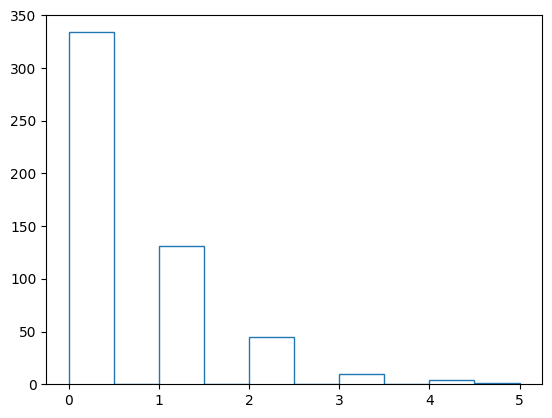

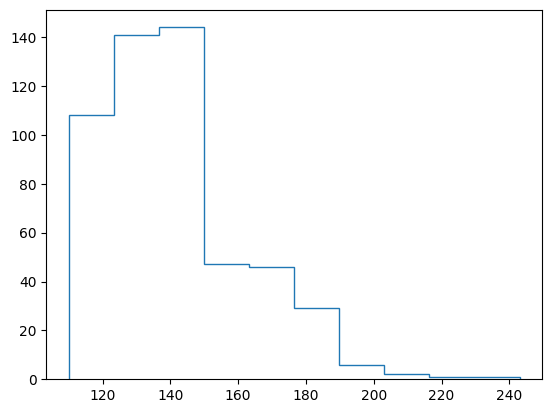

4 160
4 130
3 144
3 167
3 134
3 112
4 114
3 132
4 112
3 124
3 140
3 137
3 130
3 165
5 135


In [21]:
worst_wrong = 0
wrong_list = []
for key in wrong_per_class.keys():
  wrong = wrong_per_class[key]
  wrong_list.append(wrong)
  if wrong > worst_wrong:
    worst_wrong = wrong
print(worst_wrong)

import numpy as np
import matplotlib.pyplot as plt
counts, bins = np.histogram(wrong_list)
plt.stairs(counts, bins)
plt.show()

num_class_list = []
for key in num_img_per_class_idx.keys():
  num_class_list.append(num_img_per_class_idx[key])

counts, bins = np.histogram(num_class_list)
plt.stairs(counts, bins)
plt.show()

for key in wrong_per_class.keys():
  wrong = wrong_per_class[key]
  if wrong > 2:
    print(wrong, num_img_per_class_idx[key])

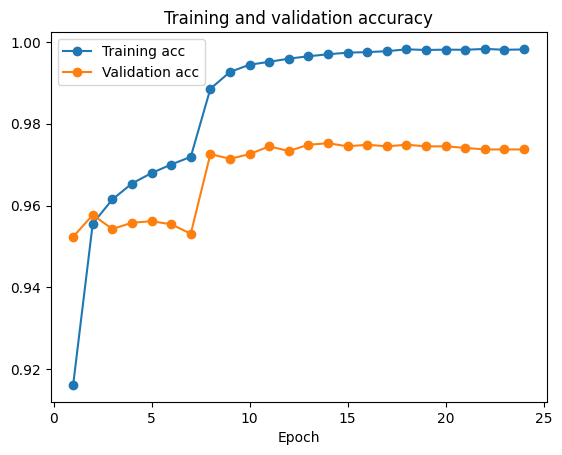

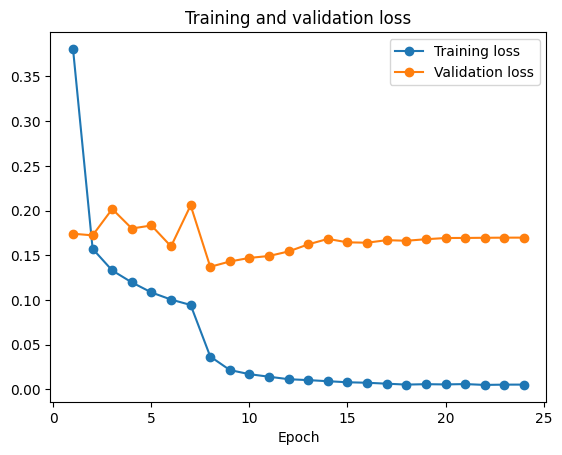

In [ ]:
plt.plot(epochs, acc, '-o', label='Training acc')
plt.plot(epochs, val_acc, '-o', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel("Epoch")
plt.legend()

plt.figure()

plt.plot(epochs, loss, '-o', label='Training loss')
plt.plot(epochs, val_loss, '-o', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel("Epoch")
plt.legend()

plt.show()

In [ ]:
import os
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


finetune_at = 28

# fine-tuning
for layer in vit_model.layers[:finetune_at - 1]:
    layer.trainable = False

num_classes = len(validation_generator.class_indices)

# Add GaussianNoise layer for robustness
noise = GaussianNoise(0.01, input_shape=(128, 128, 3)) # Change back to 224 if you want
# Classification head
head = Dense(num_classes, activation="softmax")

model = Sequential()
model.add(noise)
model.add(vit_model)
model.add(head)

model.compile(optimizer=optimizers.Adam(),
               loss="sparse_categorical_crossentropy",
               metrics=["accuracy"])

# Train the model with the new callback

history = model.fit(
          validation_generator,
          epochs=1,
          validation_data=validation_generator,
          verbose=1,
          shuffle=True,
          callbacks=[
              EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True),
              lr_scheduler_callback, cp_callback
          ])

42/42 [==============================] - ETA: 0s - loss: 6.7475 - accuracy: 0.0011  
Epoch 1: saving model to training_1/cp.ckpt
42/42 [==============================] - 5087s 123s/step - loss: 6.7475 - accuracy: 0.0011 - val_loss: 6.2629 - val_accuracy: 0.0027 - lr: 0.0010


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
model.save('/content/drive/MyDrive/MyFolder/myModel', save_format="h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.load_weights(checkpoint_path)

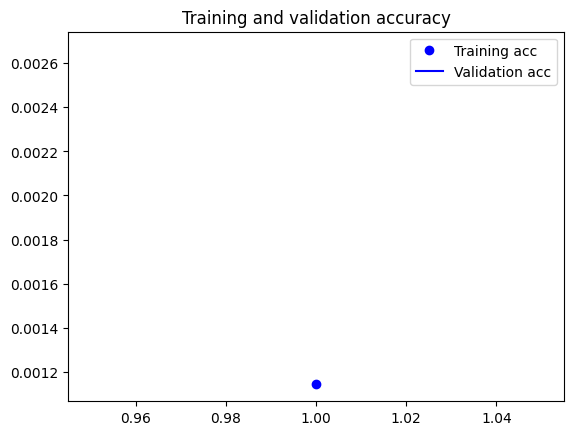

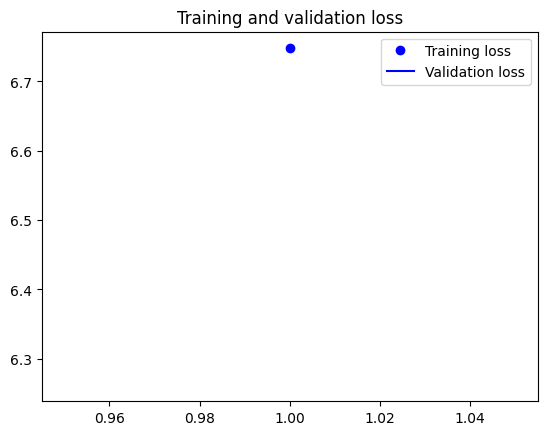

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()